In [1]:
# generate a random normal distribution
from numpy import random
import diptest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.lines import Line2D
import seaborn as sns
import os
import pandas as pd

In [2]:
folder_path = 'C:/1.1 Asia frequency data'
file_names = os.listdir(folder_path)

dataframes=[]
for file_name in file_names:
    file_path=os.path.join(folder_path, file_name)
    df=pd.read_csv(file_path, sep=';') 
    df.iloc[:,1]=df.iloc[:,1]/1000+50
    dataframes.append(df)

    
# dataframes[0] is Australia, [1] is Indonesia, [2] is Malaysia01, [3] is Malaysia02, [4] is Sinagpore
# combine dataframe[2] and dataframe[3]
combined_df = pd.concat([dataframes[2], dataframes[3]], ignore_index=True)

# replace dataframe[2] and dataframe[3] with combined_df in dataframes list
dataframes[2:4] = [combined_df]

# dataframes[0] is Australia
# dataframes[1] is Indonesia
# dataframes[2] is Malaysia
# dataframes[3] is Sinagpore

# Only select quality QI=0
flt_dataframes = []
for df in dataframes:
    flt_df = df[df['QI'] == 0]
    flt_dataframes.append(flt_df)
    
region_dict = {0: 'Australia', 1: 'Indonesia', 2: 'Malaysia',  3: 'Singapore'}

# Group the dataframes by region
region_groups = [df.groupby(lambda x: region_dict[i]) for i, df in enumerate(flt_dataframes)]    

In [3]:
%store -r asia_dip
%store -r euro_dip
asia_region = ('Australia', 'Indonesia',  'Malaysia',   'Singapore')
euro_region = ('Balearic',  'Iceland',  'Ireland')

#asia_colors = ('#66c2a5', '#fc8d62','#8da0cb','#e78ac3')
#euro_colors = ('#7fc97f', '#fdc086','#beaed4')

asia_colors = ('#1b9e77', '#d95f02','#7570b3','#e7298a')
euro_colors = ('#66a61e', '#e6ab02','#a6761d')


In [4]:
# Set the parameters for the two peaks
mu1, sigma1 = 40,  2.5 # mean and standard deviation of the first peak
mu2, sigma2 = 60,  2.5 # mean and standard deviation of the second peak

# Generate random data using the Gaussian distribution with the two peaks
x1 = np.linspace(30, 70, 100000)
y1 = (1/(sigma1*np.sqrt(2*np.pi))*np.exp(-(x1-mu1)**2/(2*sigma1**2))) + (1/(sigma2*np.sqrt(2*np.pi))*np.exp(-(x1-mu2)**2/(2*sigma2**2)))

In [5]:
# Set the parameters for the two peaks
mu1, sigma1 = 45, 3 # mean and standard deviation of the first peak
mu2, sigma2 = 55, 3 # mean and standard deviation of the second peak

# Generate random data using the Gaussian distribution with the two peaks
x2 = np.linspace(30, 70, 100000)
y2 = (1/(sigma1*np.sqrt(2*np.pi))*np.exp(-(x2-mu1)**2/(2*sigma1**2))) + (1/(sigma2*np.sqrt(2*np.pi))*np.exp(-(x2-mu2)**2/(2*sigma2**2)))

In [6]:
# Set the parameters for the two peaks
mu1, sigma1 = 50, 5 # mean and standard deviation of the first peak
mu2, sigma2 = 50, 5 # mean and standard deviation of the second peak

# Generate random data using the Gaussian distribution with the two peaks
x3 = np.linspace(30, 70, 100000)
y3 = (1/(sigma1*np.sqrt(2*np.pi))*np.exp(-(x3-mu1)**2/(2*sigma1**2))) + (1/(sigma2*np.sqrt(2*np.pi))*np.exp(-(x3-mu2)**2/(2*sigma2**2)))


In [7]:
sgp = flt_dataframes[3].f50

In [13]:
uni = random.normal(loc=0, scale=0.0015,size=100000)

In [14]:
y=[y1,uni]
y_dip=[]
for i, df in enumerate (y):
    dip,pval = diptest.diptest(df.astype(float))
    y_dip.append((dip))
    
syth=('Non-standard','Unimodal')

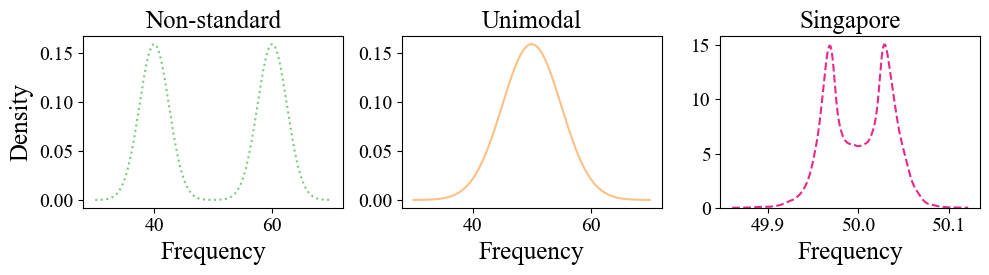

In [29]:
# Create three subplots
colors = ('#7fc97f', '#fdc086','#e7298a')
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

for ax in axs:
    ax.tick_params(axis='both', labelsize=14) 

# Plot the first peak on the first subplot
axs[0].plot(x1, y1,linestyle = 'dotted',color=colors[0])
axs[0].set_title('Non-standard',fontsize=18)
axs[0].set_ylabel('Density',fontsize=18)
axs[0].set_xlabel('Frequency',fontsize=18)

# Plot the second peak on the third subplot
axs[1].plot(x3, y3,color=colors[1])
axs[1].set_title('Unimodal',fontsize=18)
axs[1].set_xlabel('Frequency',fontsize=18)

# Plot the third peak on the second subplot
sns.kdeplot(flt_dataframes[3].f50, color='#e7298a',linestyle = 'dashed',legend=False,ax=axs[2])
axs[2].set_title('Singapore',fontsize=18)
axs[2].set_xlabel('Frequency',fontsize=18)
axs[2].set_ylabel('')

# Add a main title and adjust the layout
fig.suptitle('')
plt.tight_layout()
plt.show()
plt.rcParams.update({'font.family': 'Times New Roman'})
#plt.savefig('C:/4. Paper plots/bimodal.png')

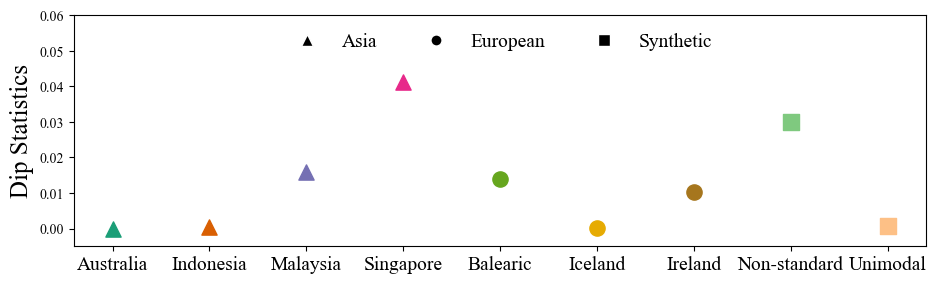

In [16]:
colors = ('#7fc97f', '#fdc086','#e7298a')
fig, ax = plt.subplots(figsize=(11, 3))

# plot the asia_dip data
for i, dip in enumerate(asia_dip):
    ax.scatter(i, dip, color=asia_colors[i], marker='^', label=asia_region[i],s=120)
    
# plot the euro_dip data
for i, dip in enumerate(euro_dip):
    ax.scatter(i+len(asia_dip), dip, color=euro_colors[i], marker='o', label=euro_region[i],s=120)
    
# plot the euro_dip data
for i, dip in enumerate(y_dip):
    ax.scatter(i+len(euro_dip)+len(asia_dip), dip, color=colors[i], marker='s',label=syth[i],s=120)


# set the axis labels and title
#ax.set_xlabel('Regions')
ax.set_ylabel('Dip Statistics',fontsize=18)
#ax.set_title('Dip Comparison')

# set the xticks
ax.set_xticks(list(range(len(asia_dip)+len(euro_dip)+2)))
ax.set_xticklabels(asia_region + euro_region + syth,fontsize=14)

# set the legend
#ax.legend(ncol=2,frameon=False)
# create legend elements
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Asia', markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='European', markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Synthetic', markerfacecolor='k', markersize=8)]

# add legend to plot
ax.legend(handles=legend_elements, ncol=3,loc='upper center', frameon=False,fontsize=14)

ax.set_ylim(-0.005, 0.06)
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.show()
#plt.savefig('C:/4. Paper plots/dip comparison.png')

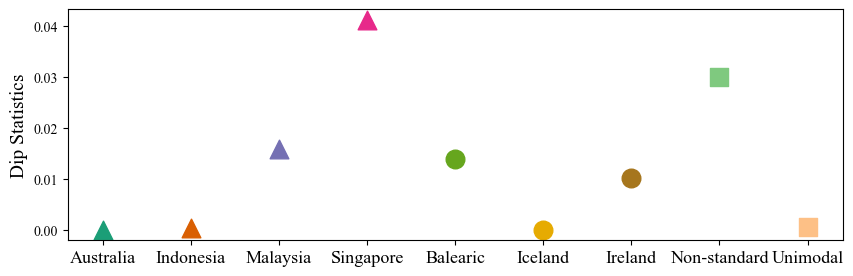

In [18]:
fig, ax = plt.subplots(figsize=(10, 3))

# plot the asia_dip data
for i, dip in enumerate(asia_dip):
    ax.scatter(i, dip, color=asia_colors[i], marker='^', label=asia_region[i],s=180)
    
# plot the euro_dip data
for i, dip in enumerate(euro_dip):
    ax.scatter(i+len(asia_dip), dip, color=euro_colors[i], marker='o', label=euro_region[i],s=180)
    
# plot the euro_dip data
for i, dip in enumerate(y_dip):
    ax.scatter(i+len(euro_dip)+len(asia_dip), dip, color=colors[i], marker='s',label=syth[i],s=180)


# set the axis labels and title
#ax.set_xlabel('Regions')
ax.set_ylabel('Dip Statistics', fontsize=14)
#ax.set_title('Dip Comparison')

# set the xticks
ax.set_xticks(list(range(len(asia_dip)+len(euro_dip)+2)))
ax.set_xticklabels(asia_region + euro_region + syth, fontsize=13)

# set the legend
#ax.legend(ncol=2,frameon=False)

# display the plot
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.show()
#plt.savefig('C:/4. Paper plots/dip comparison.png')